In [55]:
# modules we'll use
import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt

In [56]:
# read in all our data
spotify_results = pd.read_csv("../results/genetic_algorithm_stats_2022-01-23_23-54-37.csv")

In [57]:
# look at a few rows of the results file
spotify_results.sample(5)

,Generation number,Best fitness,Best genome,Worst fitness,Worst genome,Mean,Average,Standard deviation
95,95,97.224800,"Genome{fitness:97.22480010986328,genes:[Intege...",98.725571,"Genome{fitness:98.72557067871094,genes:[Intege...",97.605346,97.605346,0.435995
4,4,98.588692,"Genome{fitness:98.58869171142578,genes:[Intege...",100.862297,"Genome{fitness:100.86229705810547,genes:[Integ...",99.190575,99.190575,0.528573
57,57,97.293343,"Genome{fitness:97.29334259033203,genes:[Intege...",98.607430,"Genome{fitness:98.60742950439453,genes:[Intege...",97.727600,97.727600,0.352483
6,6,98.084389,"Genome{fitness:98.08438873291016,genes:[Intege...",99.614464,"Genome{fitness:99.61446380615234,genes:[Intege...",98.910161,98.910161,0.379895
93,93,97.224800,"Genome{fitness:97.22480010986328,genes:[Intege...",98.329597,"Genome{fitness:98.32959747314453,genes:[Intege...",97.543158,97.543158,0.302001


In [58]:
# get info about DataFrame columns
spotify_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Generation number   121 non-null    int64  
 1   Best fitness        121 non-null    float64
 2   Best genome         121 non-null    object 
 3   Worst fitness       121 non-null    float64
 4   Worst genome        121 non-null    object 
 5   Mean                121 non-null    float64
 6   Average             121 non-null    float64
 7   Standard deviation  121 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ KB


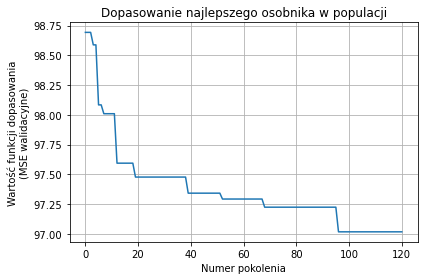

In [59]:
ax = spotify_results.plot(x='Generation number', y='Best fitness', title='Dopasowanie najlepszego osobnika w populacji',
                          grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_fitness.eps')

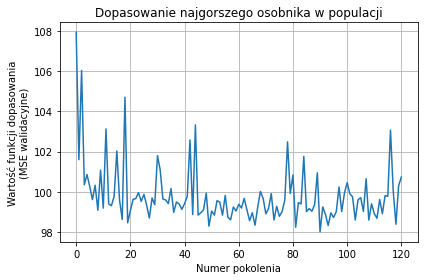

In [60]:
ax = spotify_results.plot(x='Generation number', y='Worst fitness',
                          title='Dopasowanie najgorszego osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_worst_fitness.eps')

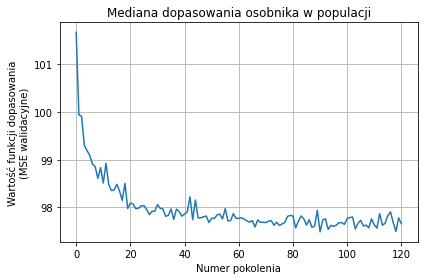

In [61]:
ax = spotify_results.plot(x='Generation number', y='Mean',
                          title='Mediana dopasowania osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_mean_fitness.eps')

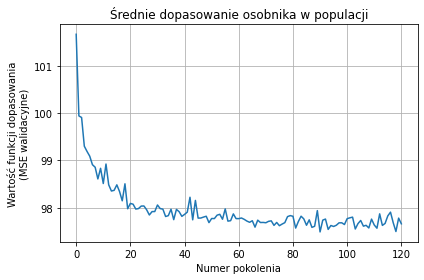

In [62]:
ax = spotify_results.plot(x='Generation number', y='Average',
                          title='Średnie dopasowanie osobnika w populacji', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_average_fitness.eps')

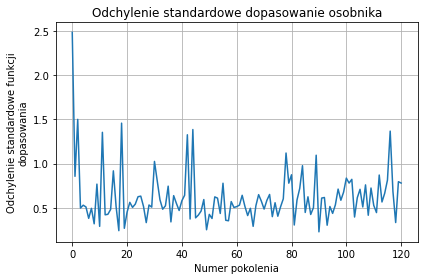

In [63]:
ax = spotify_results.plot(x='Generation number', y='Standard deviation',
                          title='Odchylenie standardowe dopasowanie osobnika', grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Odchylenie standardowe funkcji dopasowania', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_fitness_standard_deviation.eps')

In [64]:
best_genome_param_values = spotify_results['Best genome'].str.split(',genes:').str[1].str.extract(
    '\[IntegerGene\{label:hidden_1_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_1_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:hidden_2_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_2_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:hidden_3_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_3_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:batch_size,min:100,max:400,val:(\d+)\},\]\}')
best_genome_param_values[0] = best_genome_param_values[0].astype(int)
best_genome_param_values[1] = best_genome_param_values[1].astype(float)
best_genome_param_values[2] = best_genome_param_values[2].astype(int)
best_genome_param_values[3] = best_genome_param_values[3].astype(float)
best_genome_param_values[4] = best_genome_param_values[4].astype(int)
best_genome_param_values[5] = best_genome_param_values[5].astype(float)
best_genome_param_values[6] = best_genome_param_values[6].astype(int)
best_genome_param_values[7] = spotify_results['Generation number']
best_genome_param_values.rename(
    columns={0: 'hidden_1_units', 1: 'hidden_1_dropout_rate', 2: 'hidden_2_units', 3: 'hidden_2_dropout_rate',
             4: 'hidden_3_units', 5: 'hidden_3_dropout_rate', 6: 'batch_size', 7: 'generation_number'}, inplace=True)

In [65]:
best_genome_param_values.sample(5)

,hidden_1_units,hidden_1_dropout_rate,hidden_2_units,hidden_2_dropout_rate,hidden_3_units,hidden_3_dropout_rate,batch_size,generation_number
56,181,0.103798,95,0.010000,55,0.010000,100,56
59,181,0.103798,95,0.010000,55,0.010000,100,59
43,87,0.043355,70,0.010000,116,0.010000,100,43
82,162,0.230621,117,0.010000,116,0.010128,165,82
117,181,0.103798,112,0.095674,55,0.010000,100,117


In [66]:
best_genome_param_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hidden_1_units         121 non-null    int32  
 1   hidden_1_dropout_rate  121 non-null    float64
 2   hidden_2_units         121 non-null    int32  
 3   hidden_2_dropout_rate  121 non-null    float64
 4   hidden_3_units         121 non-null    int32  
 5   hidden_3_dropout_rate  121 non-null    float64
 6   batch_size             121 non-null    int32  
 7   generation_number      121 non-null    int64  
dtypes: float64(3), int32(4), int64(1)
memory usage: 5.8 KB


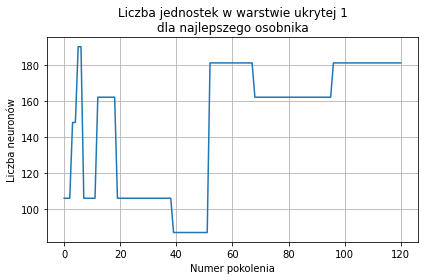

In [67]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_1_units',
                          title='\n'.join(wrap('Liczba jednostek w warstwie ukrytej 1 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_1_units.eps')

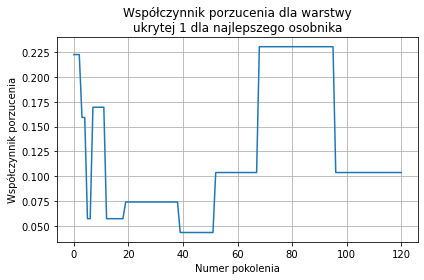

In [68]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_1_dropout_rate',
                          title='\n'.join(wrap('Współczynnik porzucenia dla warstwy ukrytej 1 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_1_dropout_rate.eps')

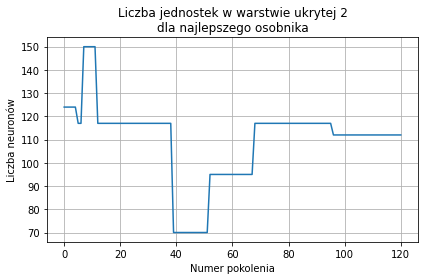

In [69]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_2_units',
                          title='\n'.join(wrap('Liczba jednostek w warstwie ukrytej 2 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_2_units.eps')

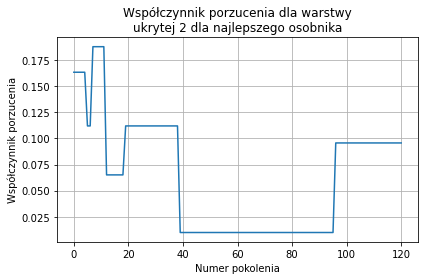

In [70]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_2_dropout_rate',
                          title='\n'.join(wrap('Współczynnik porzucenia dla warstwy ukrytej 2 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_2_dropout_rate.eps')

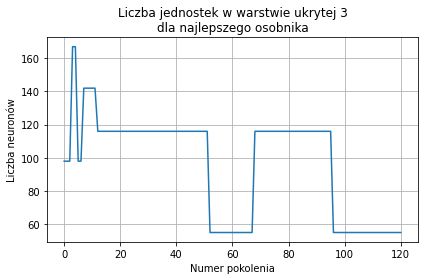

In [71]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_3_units',
                          title='\n'.join(wrap('Liczba jednostek w warstwie ukrytej 3 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_3_units.eps')

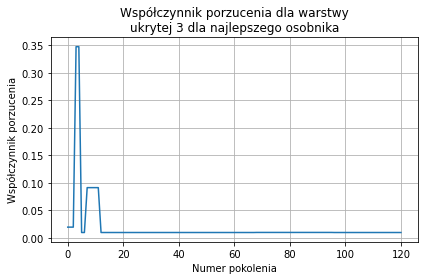

In [72]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_3_dropout_rate',
                          title='\n'.join(wrap('Współczynnik porzucenia dla warstwy ukrytej 3 dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_3_dropout_rate.eps')

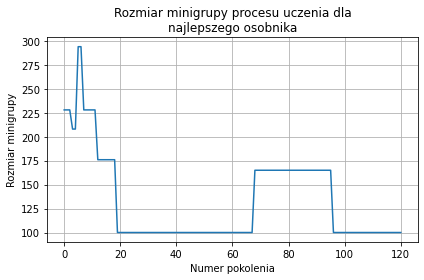

In [73]:
ax = best_genome_param_values.plot(x='generation_number', y='batch_size',
                          title='\n'.join(wrap('Rozmiar minigrupy procesu uczenia dla najlepszego osobnika', 40)), grid=True, legend=False)
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Rozmiar minigrupy', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_batch_size.eps')

In [74]:
# read in all our data
final_model_results = pd.read_csv("../results/spotify_final_he_elu_adam_181_112_55_2022-01-24_21-45-22.csv", sep=";")

In [75]:
# look at a few rows of the results file
final_model_results.sample(5)

,epoch,loss,mean_absolute_error,mean_squared_error,rmse,val_loss,val_mean_absolute_error,val_mean_squared_error,val_rmse
3,3,107.300865,7.476772,107.300865,10.358613,102.007820,7.231057,102.007820,10.099892
21,21,101.545273,7.238108,101.545273,10.076967,98.131920,6.868662,98.131920,9.906156
7,7,104.649933,7.366099,104.649933,10.229855,100.353569,7.077486,100.353569,10.017663
55,55,97.832405,7.098837,97.832405,9.891026,97.452843,7.089779,97.452843,9.871820
49,49,98.549591,7.139007,98.549591,9.927215,96.615677,6.862797,96.615677,9.829328


In [76]:
# get info about DataFrame columns
final_model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   epoch                    61 non-null     int64  
 1   loss                     61 non-null     float64
 2   mean_absolute_error      61 non-null     float64
 3   mean_squared_error       61 non-null     float64
 4   rmse                     61 non-null     float64
 5   val_loss                 61 non-null     float64
 6   val_mean_absolute_error  61 non-null     float64
 7   val_mean_squared_error   61 non-null     float64
 8   val_rmse                 61 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.4 KB


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


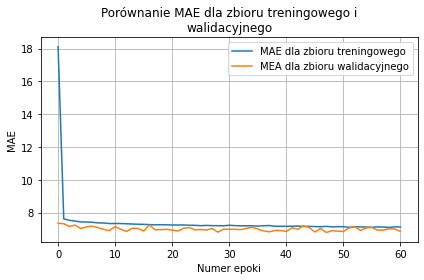

In [77]:
ax = final_model_results.plot(x='epoch', y=['mean_absolute_error', 'val_mean_absolute_error'],
                              title='\n'.join(wrap('Porównanie MAE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MAE')
ax.legend(['MAE dla zbioru treningowego', 'MEA dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mae_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


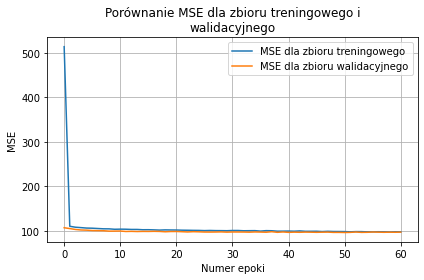

In [78]:
ax = final_model_results.plot(x='epoch', y=['mean_squared_error', 'val_mean_squared_error'],
                              title='\n'.join(wrap('Porównanie MSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MSE')
ax.legend(['MSE dla zbioru treningowego', 'MSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mse_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


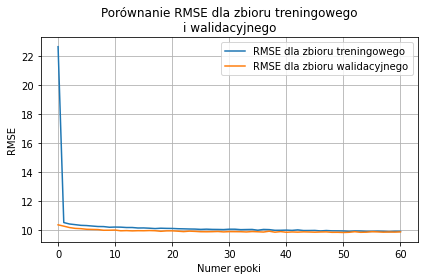

In [79]:
ax = final_model_results.plot(x='epoch', y=['rmse', 'val_rmse'],
                              title='\n'.join(wrap('Porównanie RMSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True')
ax.set_xlabel('Numer epoki')
ax.set_ylabel('RMSE')
ax.legend(['RMSE dla zbioru treningowego', 'RMSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_rmse_train_valid.eps')